# Final Project Submission

Please fill out:
* Student name: Andy Martin del Campo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Victor
* Blog post URL:


### Project Steps I think

1. Get Data
2. Clean Data
    a. Make sure all data is the right type
    b. Make sure there are no NaN values
    c. Check for duplicates
    d. Check for outliers
    e. Normalize
3. Figure out which features are important
    a. Check for correlation
    b. RFE
4. Model

look up Crisp-DM and OSEMN

# Getting the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df = pd.read_csv('kc_house_data.csv')

In [2]:
#brief look at data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#get info on columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## First Assumptions
- It looks like the data all has the same number of entries. 

# Cleaning the Data

## Check for duplicates

In [4]:
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


- For the 'id' column there are several houses which have been relisted at several points. It is okay that they have the same value
- No other column could show that there are duplicates


## Changing the column type to be something that makes sense

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
#Change date from a string to a datetime
df.date = pd.to_datetime(df.date)

In [41]:
#Change sqft_basement from a string to a float
#The issue is there are a lot of ? used. First I will change these to NaN 
#values and then the data type to float
df.sqft_basement = df.sqft_basement.replace('?',np.NaN)

for col in df:
    if col != 'date':
        df.col = df.col.astype('int64')
df.sqft_basement = df.sqft_basement.astype('float64')

AttributeError: 'DataFrame' object has no attribute 'col'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

## Using IterativeImputer to impute missing values


In [9]:
df_no_date = df.drop(columns = ['date'])
df_no_date.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
imp = IterativeImputer(max_iter=10, verbose=0)
imp.fit(df_no_date)
imputed_df = np.round(imp.transform(df_no_date))
imputed_df = pd.DataFrame(imputed_df, columns=df_no_date.columns)
imputed_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,221900.0,3.0,1.0,1180.0,5650.0,1.0,-0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,48.0,-122.0,1340.0,5650.0
1,6.414100e+09,538000.0,3.0,2.0,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,48.0,-122.0,1690.0,7639.0
2,5.631500e+09,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,131.0,98028.0,48.0,-122.0,2720.0,8062.0
3,2.487201e+09,604000.0,4.0,3.0,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,48.0,-122.0,1360.0,5000.0
4,1.954401e+09,510000.0,3.0,2.0,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,48.0,-122.0,1800.0,7503.0


In [11]:
imputed_df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
imputed_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.534750,0.006760,0.234153,3.409825,7.657915,1788.596842,291.725008,1970.999676,83.784600,98077.951845,47.694356,-122.000046,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.554376,0.081944,0.765979,0.650546,1.173200,827.759761,442.667800,29.375234,367.760789,53.513072,0.460690,0.040258,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,-0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,-274.000000,98001.000000,47.000000,-123.000000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.000000,-122.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,48.000000,-122.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,48.000000,-122.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,6.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,48.000000,-121.000000,6210.000000,871200.000000


In [13]:
imputed_df.yr_renovated.value_counts()

 0.0       17018
 2014.0       73
 2013.0       31
 2003.0       31
 2007.0       30
 2000.0       29
 2005.0       29
 1990.0       22
 2004.0       22
 82.0         22
-11.0         22
-17.0         21
 2009.0       21
 42.0         20
 104.0        20
 1989.0       20
 2006.0       20
 46.0         20
 9.0          19
-8.0          19
 35.0         19
 136.0        19
 54.0         19
 16.0         19
 20.0         19
-19.0         18
 53.0         18
 8.0          18
 2002.0       17
 34.0         17
           ...  
 594.0         1
 1971.0        1
 792.0         1
-133.0         1
-233.0         1
 291.0         1
 1948.0        1
-179.0         1
 348.0         1
-184.0         1
-108.0         1
 1934.0        1
 756.0         1
 471.0         1
 646.0         1
-232.0         1
 352.0         1
-211.0         1
 259.0         1
-126.0         1
 603.0         1
-165.0         1
 337.0         1
 626.0         1
-172.0         1
 296.0         1
-156.0         1
 1976.0       

This seems to have worked well for every feature except 'yr_renovated'. Since it gives very low years and negatives because so many 0's were already in place. This column will more than likely not be relevant. I'll also drop the index column.

In [14]:
imputed_df = imputed_df.drop(columns = ['id'])

### Edit yr_renovated so that any values below 1900 are 0

In [15]:
imputed_df.yr_renovated = imputed_df.yr_renovated.astype('int64')

In [16]:
imputed_df.loc[imputed_df.yr_renovated < 1975, 'yr_renovated'] = 0

In [17]:
imputed_df.yr_renovated.describe()

count    21597.000000
mean        61.944576
std        346.474062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [18]:
imputed_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.534750,0.006760,0.234153,3.409825,7.657915,1788.596842,291.725008,1970.999676,61.944576,98077.951845,47.694356,-122.000046,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.554376,0.081944,0.765979,0.650546,1.173200,827.759761,442.667800,29.375234,346.474062,53.513072,0.460690,0.040258,685.230472,27274.441950
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,-0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.000000,-123.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.000000,-122.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,48.000000,-122.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,48.000000,-122.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,6.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,48.000000,-121.000000,6210.000000,871200.000000


In [19]:
imputed_df.yr_renovated.value_counts()

0       20928
2014       73
2013       31
2003       31
2007       30
2000       29
2005       29
2004       22
1990       22
2009       21
1989       20
2006       20
2002       17
1998       16
1984       16
1991       16
2001       15
1999       15
2008       15
1983       15
2010       15
2015       14
1987       14
1985       14
1994       14
1986       14
1992       13
1997       12
1993       12
1995       12
1996       11
1988       11
2011        9
2012        8
1982        8
1980        8
1977        7
1979        7
1975        5
1981        4
1978        3
1976        1
Name: yr_renovated, dtype: int64

## Look at data

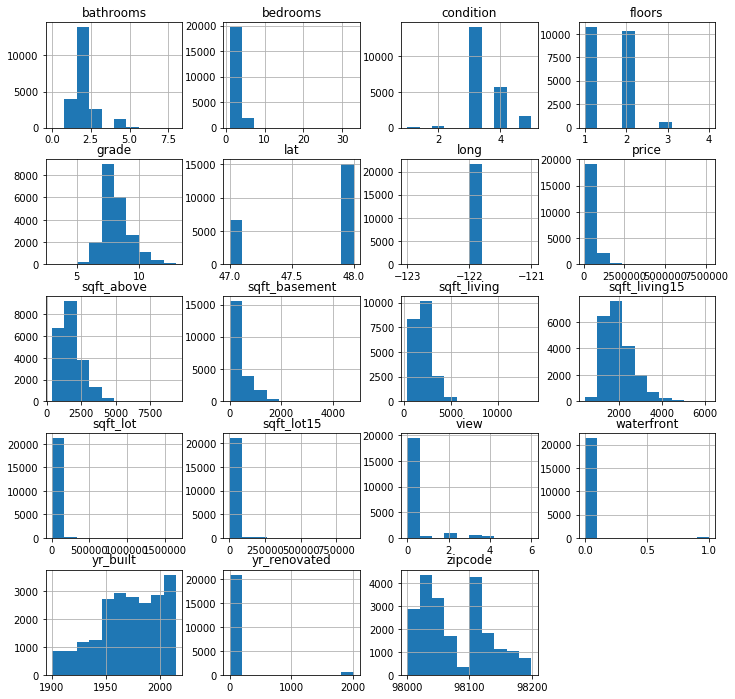

In [20]:
imputed_df.hist(figsize=(12,12));

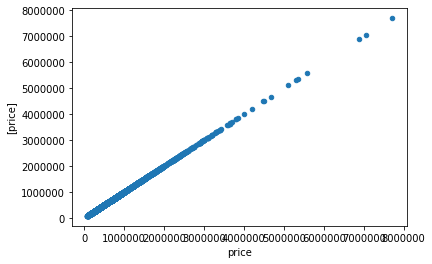

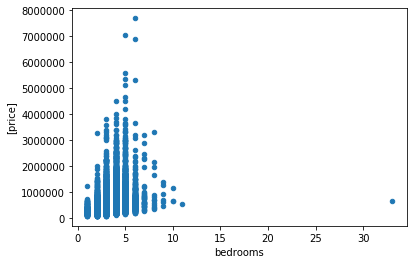

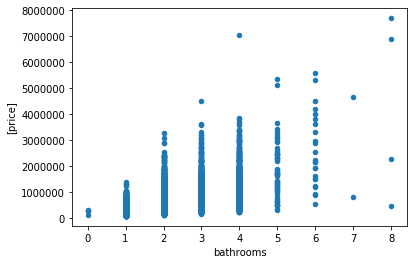

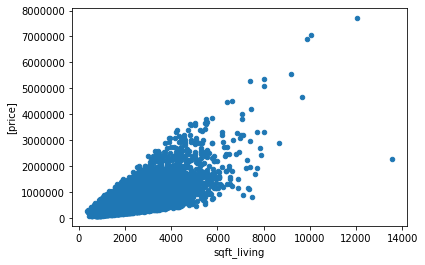

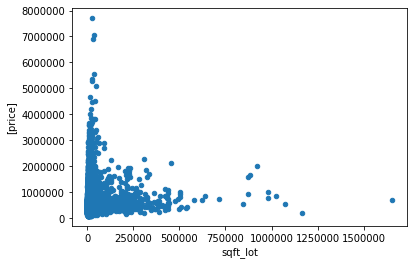

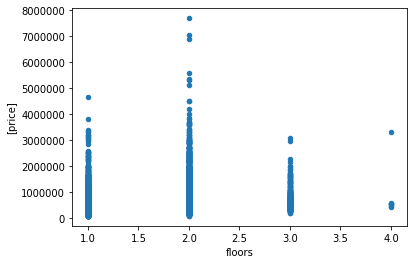

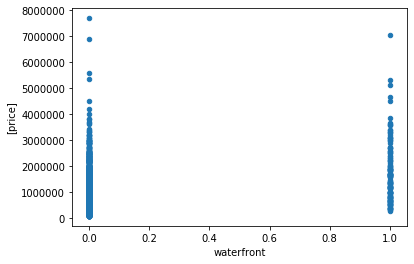

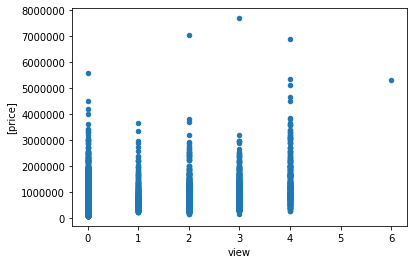

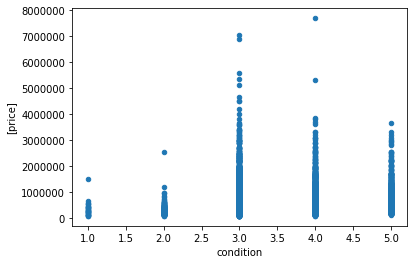

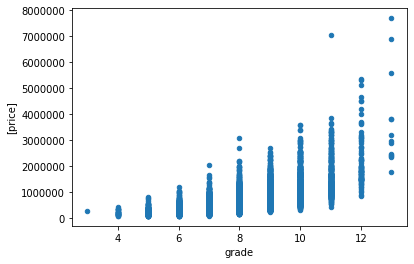

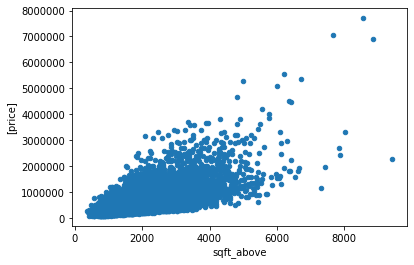

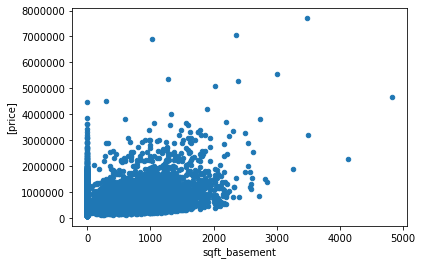

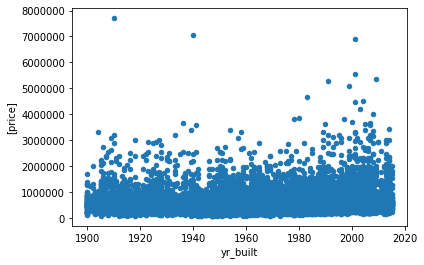

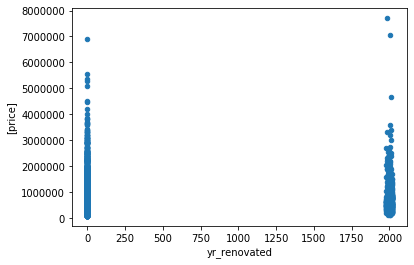

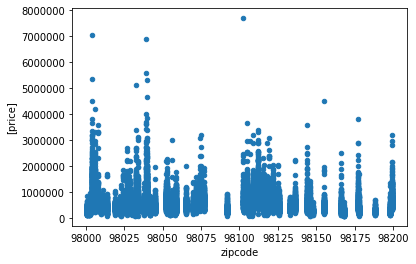

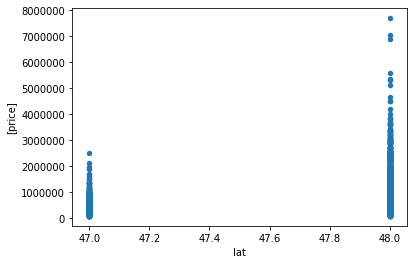

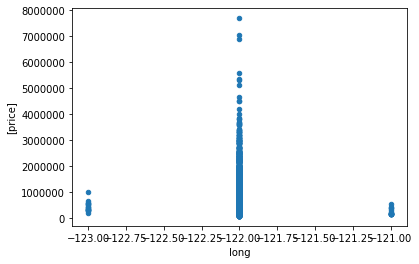

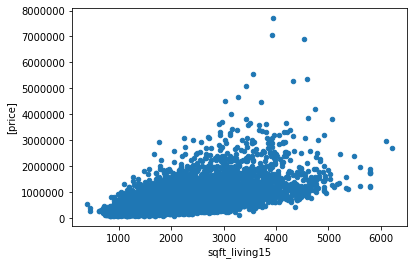

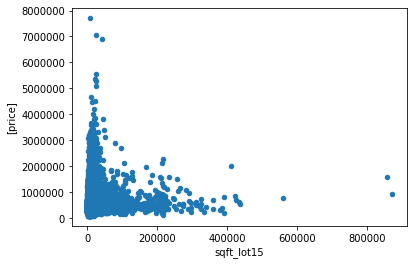

In [21]:
for col in imputed_df:
    imputed_df.plot.scatter(x=col, y=['price'])    

### Observations from scatter plots
- There seem to be a few categorical variables
    -bathrooms
    -floors
    -waterfront
    -view
    -condition
    -grade
    -lat,long
    
- There is an outlier of 33 bedrooms that should probably be removed

- Zipcodes won't fit into a model unless they are binned which doesn't make sense so they can be dropped

In [22]:
print(imputed_df[imputed_df.bedrooms > 30])

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15856  640000.0      33.0        2.0       1620.0    6000.0     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
15856         0.0   0.0        5.0    7.0      1040.0          580.0   

       yr_built  yr_renovated  zipcode   lat   long  sqft_living15  sqft_lot15  
15856    1947.0             0  98103.0  48.0 -122.0         1330.0      4700.0  


In [23]:
imputed_df.drop(imputed_df[imputed_df.bedrooms > 20].index, inplace = True)

In [24]:
#drop zip codes
imputed_df = imputed_df.drop(columns = ['zipcode'])

In [25]:
imputed_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,-0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0,48.0,-122.0,1340.0,5650.0
1,538000.0,3.0,2.0,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991,48.0,-122.0,1690.0,7639.0
2,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0,48.0,-122.0,2720.0,8062.0
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0,48.0,-122.0,1360.0,5000.0
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0,48.0,-122.0,1800.0,7503.0


## A Model Using Raw Features

In [26]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = []
for col in imputed_df:
    if col != 'price':
        predictors.append(col)
predictors = '+'.join(predictors)

formula = outcome + '~' + predictors
model = ols(formula=formula, data=imputed_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     3259.
Date:                Wed, 04 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:27:39   Log-Likelihood:            -2.9411e+05
No. Observations:               21596   AIC:                         5.883e+05
Df Residuals:                   21579   BIC:                         5.884e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -5.44e+06   4.15e+06     -1.311      0.190   -1.36e+07     2.7e+06
bedrooms      -3.507e+04   1944.745    -18.034      0.000   -3.89e+04   -3.13e+04
bathrooms      4.183e+04   2711.846     15.426      0.000    3.65e+04    4.71e+04
sqft_living     110.0808      2.211     49.789      0.000     105.747     114.414
sqft_lot          0.1203      0.047      2.547      0.011       0.028       0.213
floors        -4324.4635   3104.690     -1.393      0.164   -1.04e+04    1760.959
waterfront     6.365e+05    1.8e+04     35.339      0.000    6.01e+05    6.72e+05
view           4.938e+04   2079.379     23.746      0.000    4.53e+04    5.35e+04
condition      3.052e+04   2297.116     13.285      0.000     2.6e+04     3.5e+04
grade          9.297e+04   2122.377     43.806      0.000    8.88e+04    9.71e+04
sqft_above       74.2392      2.190     33.899      0.000      69.947      78.532
sqft_basement    35.8419      2.552     14.046      0.000      30.840      40.843
yr_built      -2339.8976     62.794    -37.263      0.000   -2462.979   -2216.816
yr_renovated     32.4142      4.091      7.923      0.000      24.395      40.434
lat            1.948e+05   3201.187     60.838      0.000    1.88e+05    2.01e+05
long           -843.2780   3.39e+04     -0.025      0.980   -6.73e+04    6.56e+04
sqft_living15    18.3465      3.327      5.514      0.000      11.825      24.868
sqft_lot15       -0.4116      0.072     -5.687      0.000      -0.553      -0.270
==============================================================================
Omnibus:                    19096.734   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2087049.543
Skew:                           3.785   Prob(JB):                         0.00
Kurtosis:                      50.561   Cond. No.                     1.69e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.92e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Deal with Categorical Variables

In [27]:
bedroom_dummies = pd.get_dummies(imputed_df['bedrooms'], prefix='beds', 
                                   drop_first=True)
bathroom_dummies =  pd.get_dummies(imputed_df['bathrooms'], prefix='baths', 
                                   drop_first=True)
floor_dummies = pd.get_dummies(imputed_df['floors'], prefix='flr', 
                                                  drop_first=True)
waterfront_dummies = pd.get_dummies(imputed_df['waterfront'], prefix='wtrft', 
                                   drop_first=True)
view_dummies = pd.get_dummies(imputed_df['view'], prefix='view', 
                                   drop_first=True)
grade_dummies =  pd.get_dummies(imputed_df['grade'], prefix='grade', 
                                   drop_first=True)
condition_dummies = pd.get_dummies(imputed_df['condition'], prefix='cond', 
                                   drop_first=True)
lat_dummies =  pd.get_dummies(imputed_df['lat'], prefix='lat', 
                                   drop_first=True)
long_dummies =  pd.get_dummies(imputed_df['long'], prefix='long', 
                                   drop_first=True)

df = imputed_df

In [28]:
#Remove old variables columns
df = df.drop(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade',
                     'condition', 'lat', 'long'], axis=1)

In [29]:
#Add new dummy columns
df = pd.concat([df, bedroom_dummies, bathroom_dummies, floor_dummies, waterfront_dummies, 
               view_dummies, grade_dummies, condition_dummies, lat_dummies, 
              long_dummies], axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 53 columns):
price            21596 non-null float64
sqft_living      21596 non-null float64
sqft_lot         21596 non-null float64
sqft_above       21596 non-null float64
sqft_basement    21596 non-null float64
yr_built         21596 non-null float64
yr_renovated     21596 non-null int64
sqft_living15    21596 non-null float64
sqft_lot15       21596 non-null float64
beds_2.0         21596 non-null uint8
beds_3.0         21596 non-null uint8
beds_4.0         21596 non-null uint8
beds_5.0         21596 non-null uint8
beds_6.0         21596 non-null uint8
beds_7.0         21596 non-null uint8
beds_8.0         21596 non-null uint8
beds_9.0         21596 non-null uint8
beds_10.0        21596 non-null uint8
beds_11.0        21596 non-null uint8
baths_1.0        21596 non-null uint8
baths_2.0        21596 non-null uint8
baths_3.0        21596 non-null uint8
baths_4.0        21596 non-null uint8
b

## Apply Log Transform to Non-Normal Features


In [31]:
non_normal = ['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']
df_log = pd.DataFrame([])
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))
    df_log[feat] = df[feat]

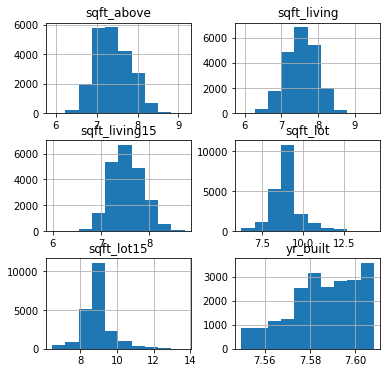

In [32]:
df_log.hist(figsize=(6,6));

C:\Users\Andy\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


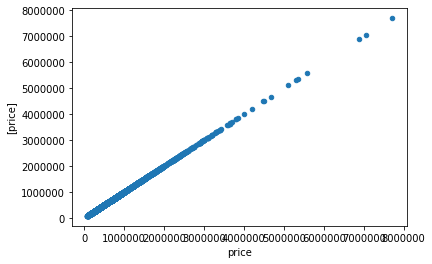

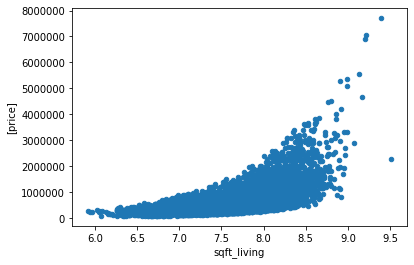

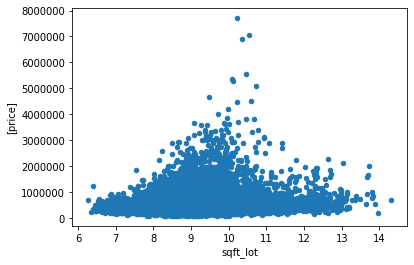

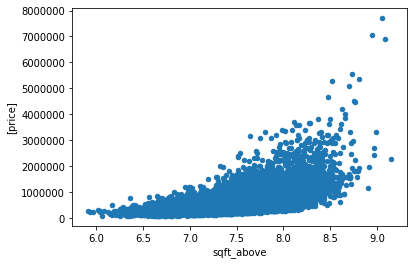

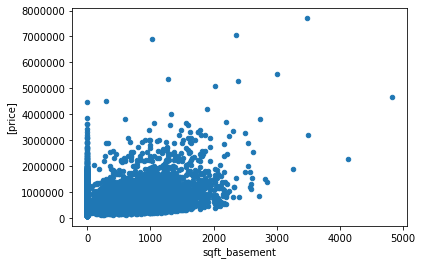

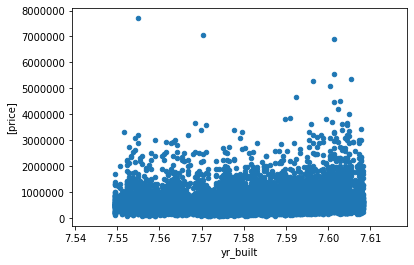

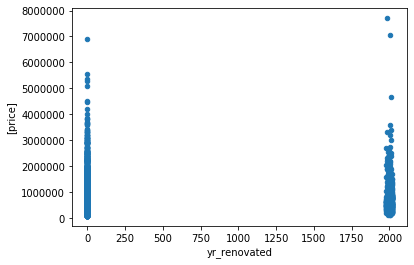

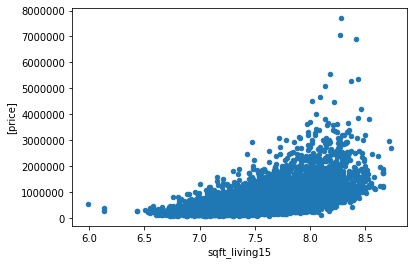

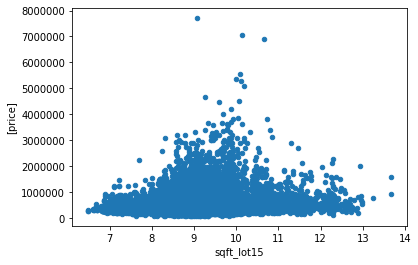

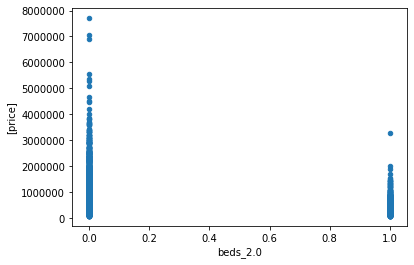

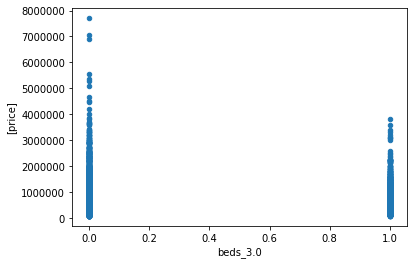

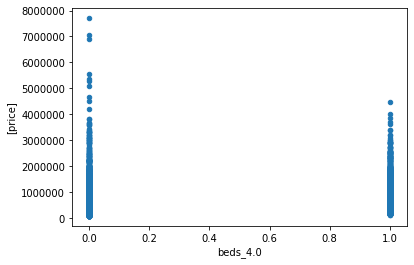

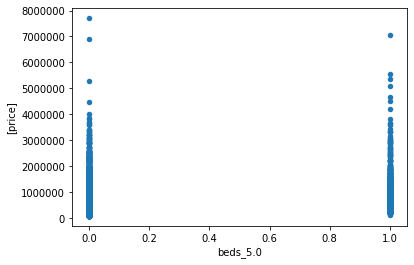

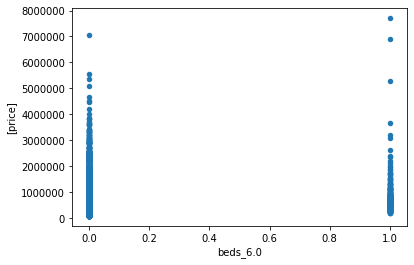

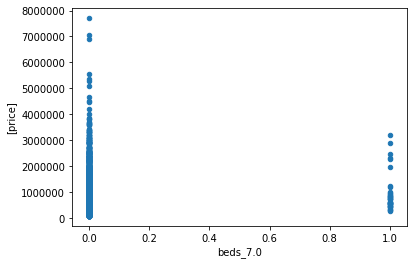

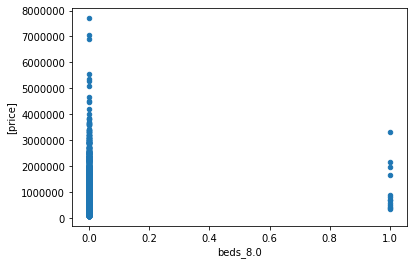

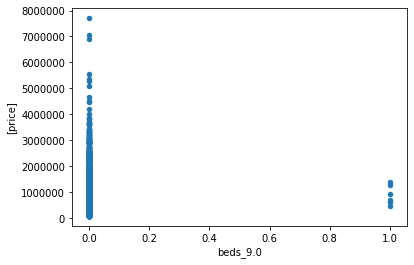

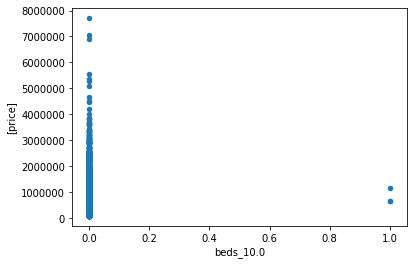

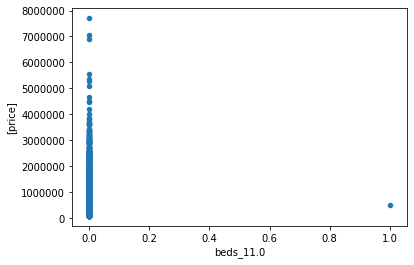

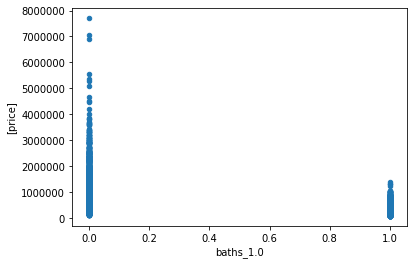

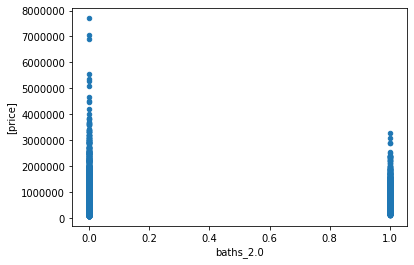

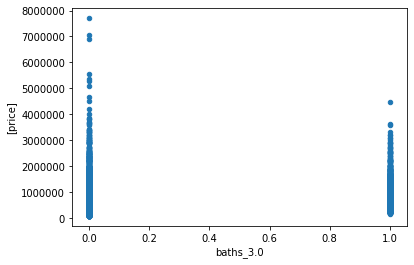

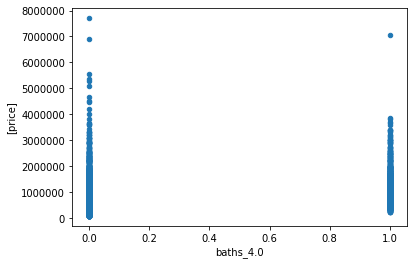

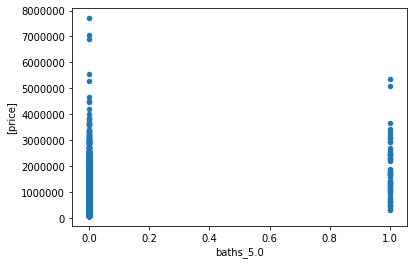

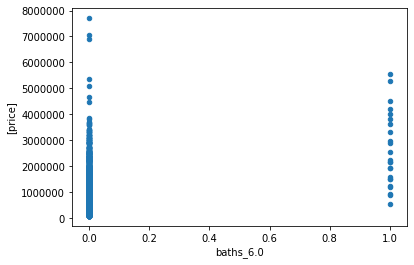

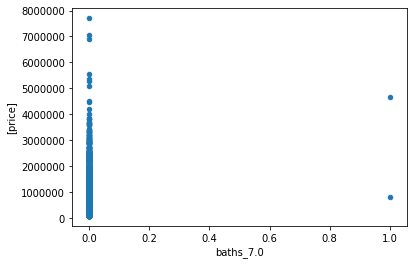

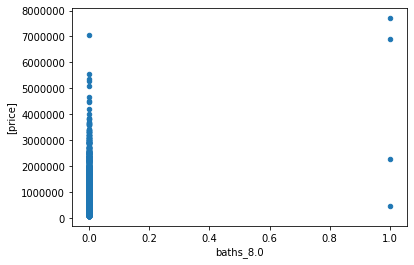

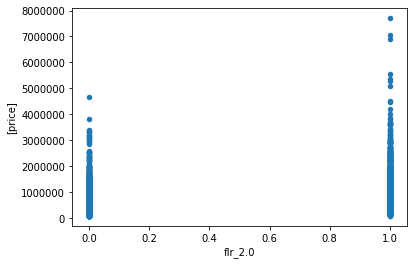

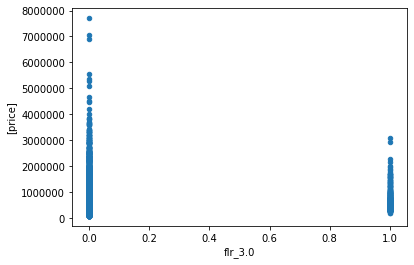

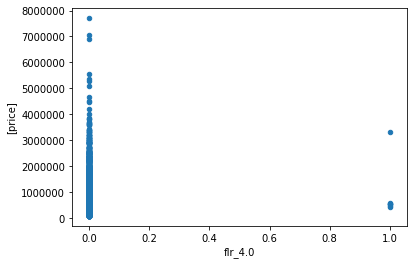

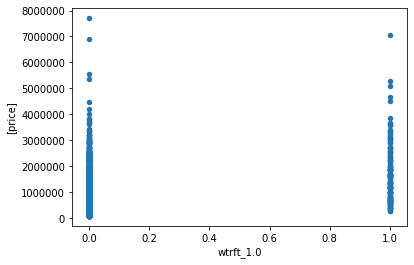

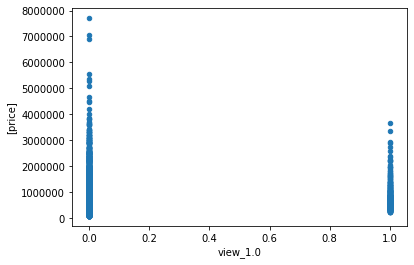

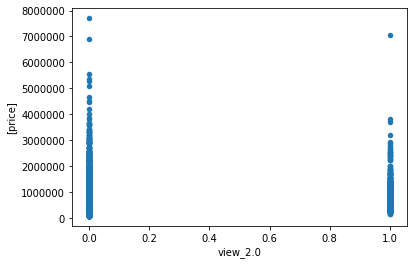

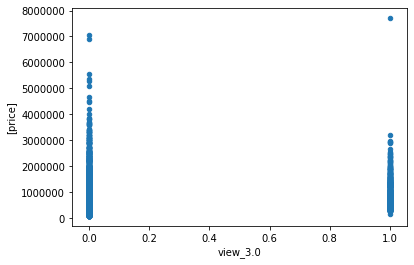

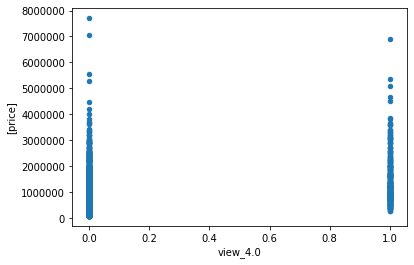

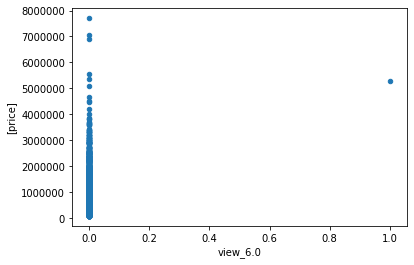

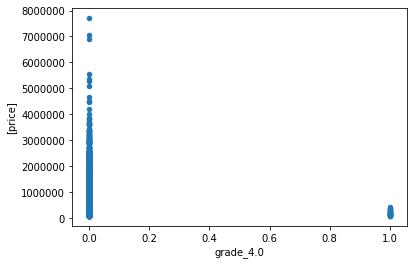

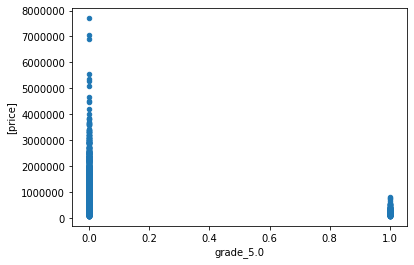

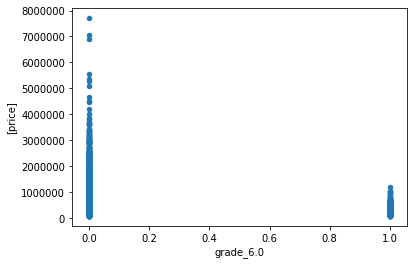

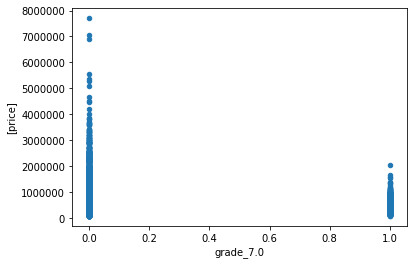

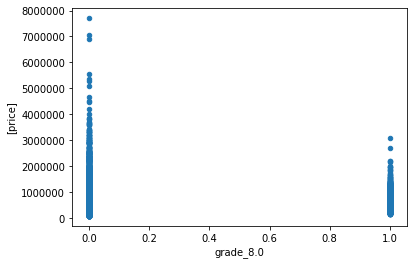

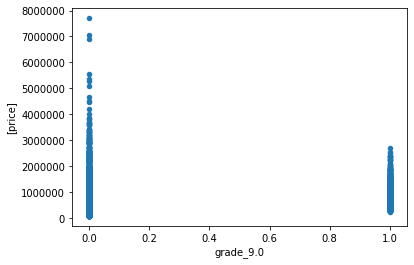

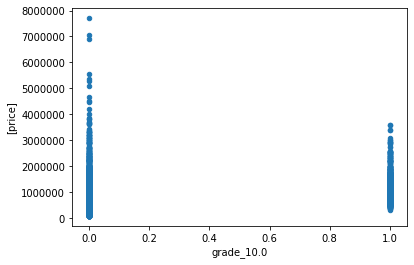

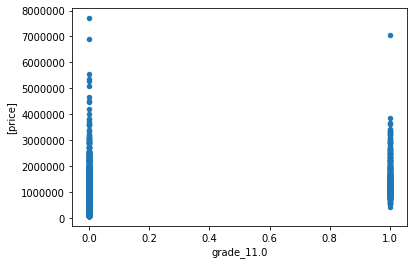

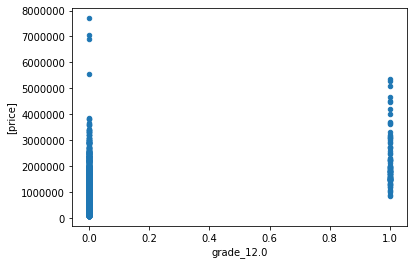

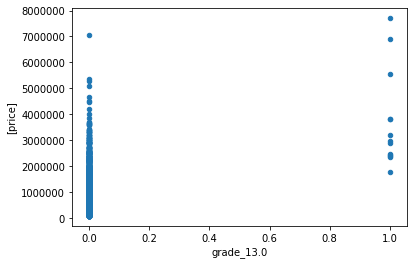

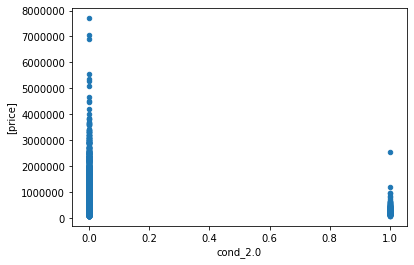

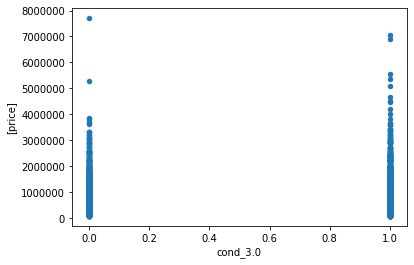

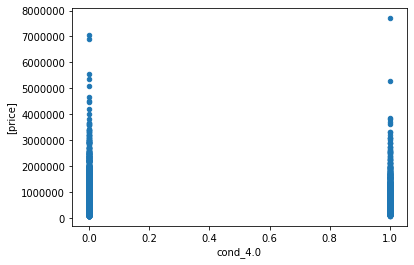

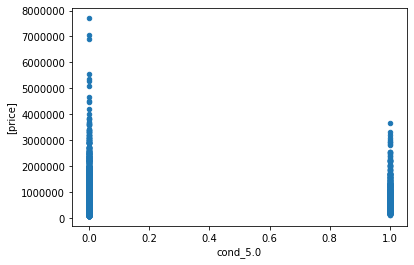

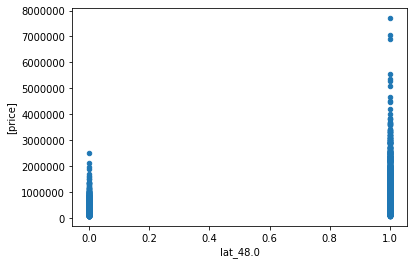

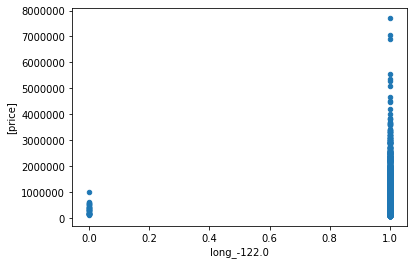

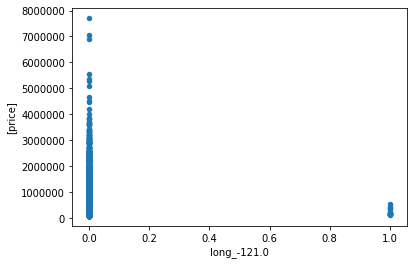

In [33]:
for col in df:
    df.plot.scatter(x=col, y=['price'])    

## Apply Min-Max Scaling

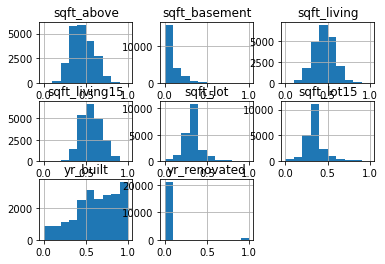

In [34]:
non_normal = ['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'sqft_living15', 
              'sqft_lot15', 'sqft_basement', 'yr_renovated']
#set all datatypes to int first
#for feat in non_normal:
#    df[feat] = df[feat].astype('int64')
    
df_scaled = pd.DataFrame([])
for feat in non_normal:
    scaled = df[feat]
    df[feat] = (scaled-min(scaled))/(max(scaled)-min(scaled))
    df_scaled[feat] = df[feat]

df_scaled.hist();

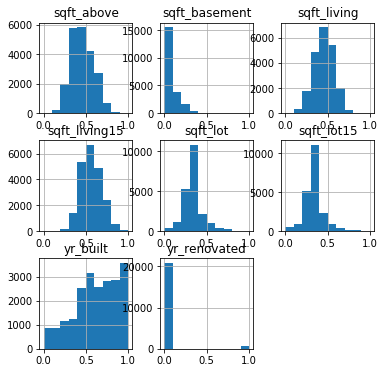

In [35]:
df_scaled.hist(figsize=(6,6));

In [36]:
df.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,beds_2.0,...,grade_11.0,grade_12.0,grade_13.0,cond_2.0,cond_3.0,cond_4.0,cond_5.0,lat_48.0,long_-122.0,long_-121.0
0,221900.0,0.322166,0.295858,0.358392,0.000000,0.485598,0.000000,0.441342,0.300162,0,...,0,0,0,0,1,0,0,1,1,0
1,538000.0,0.538392,0.326644,0.546652,0.082988,0.450745,0.988089,0.525882,0.342058,0,...,0,0,0,0,1,0,0,1,1,0
2,180000.0,0.203585,0.366664,0.226478,0.000000,0.293018,0.000000,0.699256,0.349544,1,...,0,0,0,0,1,0,0,1,1,0
3,604000.0,0.463123,0.280700,0.322322,0.188797,0.572419,0.000000,0.446739,0.283185,0,...,0,0,0,0,0,0,1,1,1,0
4,510000.0,0.420302,0.340224,0.467563,0.000000,0.761879,0.000000,0.548854,0.339562,0,...,0,0,0,0,1,0,0,1,1,0


In [37]:
df.describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,beds_2.0,...,grade_11.0,grade_12.0,grade_13.0,cond_2.0,cond_3.0,cond_4.0,cond_5.0,lat_48.0,long_-122.0,long_-121.0
count,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,...,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,0.454797,0.339315,0.457866,0.060521,0.622407,0.030743,0.564872,0.344802,0.127801,...,0.018476,0.004121,0.000602,0.007872,0.649194,0.262873,0.078718,0.694342,0.998379,0.000787
std,3.673760e+05,0.117836,0.111877,0.131995,0.091841,0.254556,0.171951,0.119298,0.112878,0.333876,...,0.134667,0.064065,0.024528,0.088375,0.477233,0.440204,0.269305,0.460696,0.040226,0.028046
min,7.800000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,0.375546,0.281688,0.361000,0.000000,0.450745,0.000000,0.479997,0.285936,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.500000e+05,0.455945,0.332938,0.444662,0.000000,0.658799,0.000000,0.556861,0.341712,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,6.450000e+05,0.536222,0.374886,0.552296,0.116183,0.847305,0.000000,0.647535,0.380616,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,7.700000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Run Model

In [38]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

In [ ]:
for col in df:
    

In [39]:
model = ols(formula=formula, data=df).fit()

PatsyError: numbers besides '0' and '1' are only allowed with **
    price~sqft_living+sqft_lot+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15+beds_2.0+beds_3.0+beds_4.0+beds_5.0+beds_6.0+beds_7.0+beds_8.0+beds_9.0+beds_10.0+beds_11.0+baths_1.0+baths_2.0+baths_3.0+baths_4.0+baths_5.0+baths_6.0+baths_7.0+baths_8.0+flr_2.0+flr_3.0+flr_4.0+wtrft_1.0+view_1.0+view_2.0+view_3.0+view_4.0+view_6.0+grade_4.0+grade_5.0+grade_6.0+grade_7.0+grade_8.0+grade_9.0+grade_10.0+grade_11.0+grade_12.0+grade_13.0+cond_2.0+cond_3.0+cond_4.0+cond_5.0+lat_48.0+long_-122.0+long_-121.0
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ^^^^^

In [ ]:
df.head()